# Lab 3
# Parametric classification
# ---------------------------------------------------

<h2>Table of contents </h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Introduction</li>
    <li> Simple logistic regression  </li>
    <li> Multivariable logistic regression </li>
    <li> Logistic regression with regularization </li>
    <li> Comparison of the results obtained with the different models </li>
</ol>

</div>

<hr>


## 1. Introduction

Assume that you want to design a parametric classification model on a set of observation, where each observation is described in terms of a set of variables. Without knowing anything else about the data set, provide a reasoned justification:

(a) Explain in your own words what is the main difference between supervised learning methods and unsupervised learning methods.  Give an example of application of each type of method. Briefly describe the input and output variables you would consider in each example.

In an unsupervised method, you don't consider the labels in order to produce an output, only the inputs. You don't have test and training sets in unsupervised. You learn the "structure" of the data by grouping examples into consistent groups with similar characteristics.

Supervised learning aims to learn the relationship between feature vectors and the labels associated with each vector. There are two types of supervised learning: • Regression: The set of labels is numberable, it is continuous • Classification: The label set is not numeric, it is discrete

b) Explain in your own words the main difference between a linear and a non-linear model.

A linear model can be described by a linear equation (a polynome). It is less complex than a non-linear model.

c) Explain the concept of overfitting and generalization. If you wish, you can support your answer with an outline or drawing. Explain in your own words how you could get the designed model to generalize well.

Overfitting means that your model predicts too many times one class compared to what it should.

Generalizations means that your model can well predicts the class of new data according to its training.



For the development of this first practice we will analyze the "Pima Indian Diabetes" database already preprocessed, where the rows of the file correspond to the observations and the columns to the variables.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross-validation will be considered.

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [99]:
# Load the dataset (already preprocessed)



# Define the input and the output




In [100]:
# Show the first rows of the input

In [101]:
# Show the first rows of the output

In [102]:
# We define the training set (70% of the observations) and test set (30% of the observations).
# We use a fixed value of Random state to obtain always the same results.
# For more details, see the following link: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html


In [103]:
# Show the first rows of the Xtrain

In [104]:
X_train = pd.read_csv("znorm_scaled_x_train.csv") # already normalized
X_test = pd.read_csv("znorm_scaled_x_test.csv") # already normalized
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")


In [105]:
Y_test.head()

,Outcome
0,1
1,1
2,1
3,0
4,0


#### Define the figure of merit, for example, accuracy, sensitivity, specificity, ROC-AUC

In [106]:
# Define several figures of merit. Remember that you should also show the confusion matrix
accuracies=[]
sensitivities=[]
specificities=[]
aucs=[]

## 2.  Logistic regression


(a) Design a logistic regression model using the training and test subsets described above. Clearly indicate what the desired output is.

b) Comment on the confusion matrix as well as the results obtained in terms of at least two figure of merit.

c) Indicate if the figure of merit obtained in the test set change after normalizing the variables.

d) Justify which features are more relevant in this case.


In [107]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


# Logistic regression
regressor = LogisticRegression()

# Train the model using X_train using only the feature 'Age' as the input
regressor = regressor.fit(np.array(X_train['Age']).reshape(-1, 1), Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coefficients
print(regressor.coef_)


# Predic the values using the test set. Obtain both the hard and the soft output
y_pred = regressor.predict(np.array(X_test['Age']).reshape(-1, 1))
y_prob_pred = regressor.predict_proba(np.array(X_test['Age']).reshape(-1, 1))

print(f'Y_pred: {y_pred} ')
print(f'y_prob_pred: {y_prob_pred} ')



[-0.02215202]
[[0.51417642]]
Y_pred: [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1] 
y_prob_pred: [[0.45500682 0.54499318]
 [0.63726743 0.36273257]
 [0.57065632 0.42934368]
 [0.61550813 0.38449187]
 [0.64794596 0.35205404]
 [0.64794596 0.35205404]
 [0.30333915 0.69666085]
 [0.62645174 0.37354826]
 [0.53619466 0.46380534]
 [0.51300563 0.48699437]
 [0.59327662 0.40672338]
 [0.40939742 0.59060258]
 [0.59327662 0.40672338]
 [0.55922821 0.44077179]
 [0.58200959 0.417

/home/alumnos/tachennf/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
tn = cm[0, 0]
fn = cm[1, 0]
tp = cm[1, 1]
fp = cm[0, 1]

print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy
Accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {Accuracy}')


#Sensibility/ sensitivity
Sensibility = recall_score(Y_test, y_pred)
print(f'Sensibility: {Sensibility}')

print(classification_report(Y_test, y_pred))


[[98 40]
 [82 66]]
tn: 98, fp:40, fn:82, tp:66
Accuracy: 0.5734265734265734
Sensibility: 0.44594594594594594
              precision    recall  f1-score   support

           0       0.54      0.71      0.62       138
           1       0.62      0.45      0.52       148

    accuracy                           0.57       286
   macro avg       0.58      0.58      0.57       286
weighted avg       0.58      0.57      0.57       286



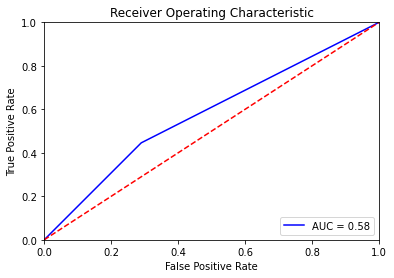

In [109]:
# Compute the AUC and the ROC
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
specificity = 1 - fpr

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [110]:
accuracies.append(Accuracy)
sensitivities.append(Sensibility)
specificties.append(specificity)
aucs.append(roc_auc)


## 3. Multivariable Logistic Regression 



In [111]:
# Should you use your normalized data?

# Logistic regression
multi_regressor = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model using the training data
multi_regressor.fit(X_train, Y_train)

# Show the intercept
print(multi_regressor.intercept_)

# Show the coefficients
print(multi_regressor.coef_)

# Compute the predicted values for the test set
y_pred = multi_regressor.predict(X_test)

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# Compute the rates
tn = cm[0, 0]
fn = cm[1, 0]
tp = cm[1, 1]
fp = cm[0, 1]
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}') # 120, 31, 30, 50, 0.735 (accu), 0.625 (sensi)

# Compute the accuracy
Accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {Accuracy}')


#Sensibility/ sensitivity
Sensibility = recall_score(Y_test, y_pred)
print(f'Sensibility: {Sensibility}')

print(classification_report(Y_test, y_pred))

[-0.00210435]
[[ 0.2503402   0.48681552 -0.03767533 -0.03592535 -0.05193825  0.35867896
   0.26070501  0.0559643 ]]
[[102  36]
 [ 50  98]]
tn: 102, fp:36, fn:50, tp:98
Accuracy: 0.6993006993006993
Sensibility: 0.6621621621621622
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       138
           1       0.73      0.66      0.70       148

    accuracy                           0.70       286
   macro avg       0.70      0.70      0.70       286
weighted avg       0.70      0.70      0.70       286



/home/alumnos/tachennf/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


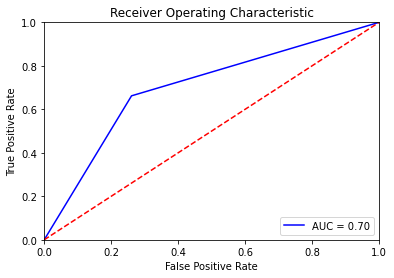

In [112]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
specificity = 1 - fpr

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
accuracies.append(Accuracy)
sensitivities.append(Sensibility)
specificties.append(specificity)
aucs.append(roc_auc)

Important! You can explore what results are obtained when: (1) you normalize the variables; (2) you discard some features based on the value of their coefficients; (3) you use other approaches such as stats.

## 4. Logistic regression with regularization

a) Indicate whether the performance obtained in the test set changes when Ridge or Lasso are considered.

b) Justify which characteristics are more relevant for these models.

In [114]:
Y_train.values.reshape(-1)

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [115]:
# Logistic regression
from sklearn.model_selection import GridSearchCV

# C values and penalty
parameters = {"C":np.linspace(1e-4,10,100), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# Logistic regression model
model = LogisticRegression(solver='liblinear')

# Grid search
clf = GridSearchCV(model, parameters)

# Train using X_train
clf.fit(X_train, Y_train.values.reshape(-1))


# We show the best value of the parameter and the score
print(clf.best_params_)
print(clf.best_score_)


# The predicted output is obtained
y_pred = clf.predict(X_test)



{'C': 0.10110909090909091, 'penalty': 'l2'}
0.7342722477836382


### Cristina results 
{'C': 0.3031272727272727, 'penalty': 'l1'}
0.7801661474558671

In [116]:
#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# Compute the rates
tn = cm[0, 0]
fn = cm[1, 0]
tp = cm[1, 1]
fp = cm[0, 1]
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}') # 120, 31, 30, 50, 0.735 (accu), 0.625 (sensi)

# Compute the accuracy
Accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {Accuracy}')


#Sensibility/ sensitivity
Sensibility = recall_score(Y_test, y_pred)
print(f'Sensibility: {Sensibility}')

print(classification_report(Y_test, y_pred))

[[100  38]
 [ 50  98]]
tn: 100, fp:38, fn:50, tp:98
Accuracy: 0.6923076923076923
Sensibility: 0.6621621621621622
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       138
           1       0.72      0.66      0.69       148

    accuracy                           0.69       286
   macro avg       0.69      0.69      0.69       286
weighted avg       0.69      0.69      0.69       286



### Cristina results

tn: 100, fp:38, fn:50, tp:98
Accuracy: 0.6923076923076923
Sensibility: 0.6621621621621622

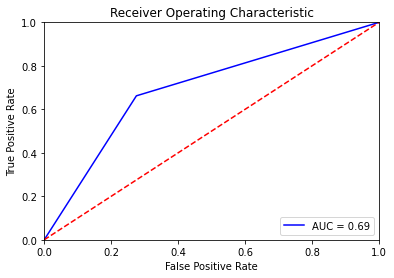

In [117]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
specificity = 1 - fpr


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
accuracies.append(Accuracy)
sensitivities.append(Sensibility)
specificties.append(specificity)
aucs.append(roc_auc)

## 5. Comparison of the results obtained with the different models


Include in a table the performances of the test set obtained according to different figures of merit:

In view of the results obtained, answer, if possible, the following questions:

(a) Justify with which scheme of those analyzed you obtain better performances in the test set.

b) Justify the influence of the regularization parameter on the results obtained.

c) Justify reasonably if the fact of making a single partition of the cases in the training and test sets can influence the results obtained.

d) Starting from the original data, perform a new partition of the cases in the training and test sets. Select one of the classifiers analyzed (indicate the classifier chosen) and obtain again the confusion matrix and the evaluation measures. Comment on the results obtained.


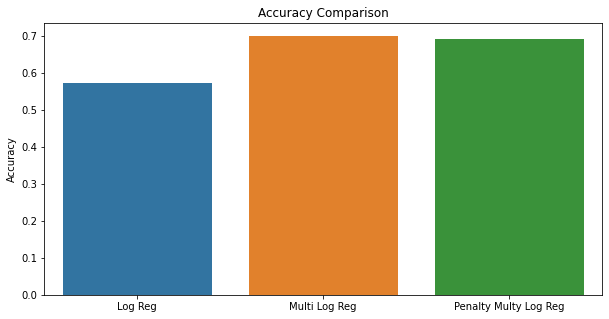

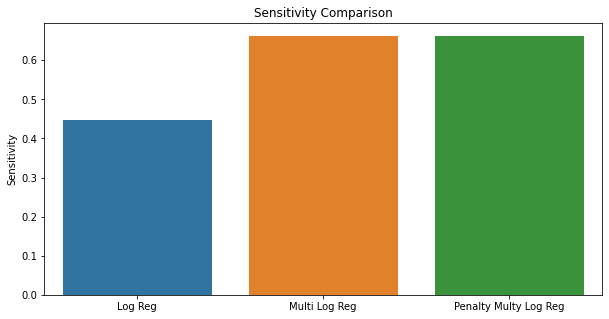

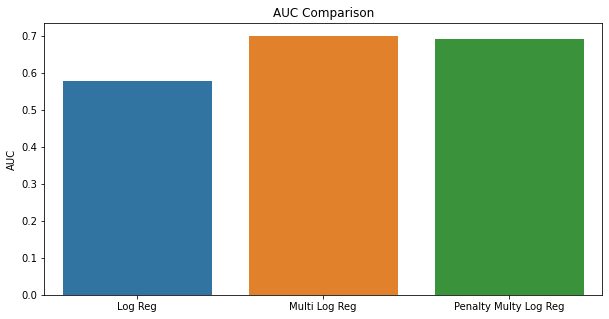

In [120]:
model_names = ["Log Reg", "Multi Log Reg", "Penalty Multy Log Reg"]  # Replace with your actual model names

# Create a bar plot for accuracy scores
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Create a bar plot for sensitivity scores
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=sensitivities)
plt.title("Sensitivity Comparison")
plt.ylabel("Sensitivity")
plt.show()

# Create a bar plot for AUC scores
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=aucs)
plt.title("AUC Comparison")
plt.ylabel("AUC")
plt.show()